# Yu-Gi-Oh! Exploration 
### It is time to duel!

#### Yu-Gi-Oh is the most popular trading card game. It contains more than 6000 cards to play with and to make a deck from.
#### We will explore the Yu-Gi-Oh! cards and try to understand and discover the relations between card types

In [1]:
#import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Let's start by importing the dataset and viewing the first few records..

In [2]:
card_data = pd.read_csv('card_data.csv')
print(card_data.shape)
card_data.head()

(6534, 7)


,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,NaN,Continuous,NaN,NaN,NaN
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
2,Gem-Enhancement,Trap Card,NaN,Normal,NaN,NaN,NaN
3,Magician's Circle,Trap Card,NaN,Normal,NaN,NaN,NaN
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0


### In yugioh, we may have the same card having multiple artworks (like the famous "Dark Magician" monster card having 4-5 artworks), which may leave us with redundant data in our dataset, so let's check that out.

In [3]:
#check for duplicates in dataset
card_data.duplicated().sum()

85

### we'll find and drop those redundant records.

In [4]:
card_data.drop_duplicates(inplace=True)
#let's check the data again to ensure there is no duplicates
card_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6449 entries, 0 to 6522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       6449 non-null   object 
 1   Type       6449 non-null   object 
 2   Level      4215 non-null   float64
 3   Race       6449 non-null   object 
 4   Attribute  4215 non-null   object 
 5   ATK        4215 non-null   float64
 6   DEF        4215 non-null   float64
dtypes: float64(3), object(4)
memory usage: 403.1+ KB


### It appears that there is null values in the `Level`, `Attribute`, `ATK` and `DEF` fields. In yugioh, there are three main card types: Monster, Spell and Trap cards. These attributes are found only in Monster cards. In order to overcome this issue, I will make 3 dataframe, a card type each to ease the usage of data.

In [5]:
#display the card types
card_data['Type'].unique()

array(['Trap Card', 'Normal Monster', 'Flip Effect Monster',
       'Effect Monster', 'Spell Card', 'Tuner Monster', 'Token',
       'Synchro Monster', 'XYZ Monster', 'Pendulum Effect Monster',
       'Fusion Monster', 'Normal Tuner Monster', 'Spirit Monster',
       'Union Effect Monster', 'Ritual Monster', 'Ritual Effect Monster',
       'Gemini Monster', 'Toon Monster', 'Pendulum Normal Monster',
       'Pendulum Flip Effect Monster', 'Synchro Tuner Monster',
       'XYZ Pendulum Effect Monster', 'Pendulum Tuner Effect Monster',
       'Synchro Pendulum Effect Monster'], dtype=object)

In [6]:
# filtering spell cards
spell_cards = card_data.query("Type == 'Spell Card'")
spell_cards = spell_cards.drop(axis=1, labels=['Level', 'ATK', 'DEF', 'Attribute'])
spell_cards.head()

,Name,Type,Race
7,Dark Magic Expanded,Spell Card,Quick-Play
18,Hero Flash!!,Spell Card,Normal
19,E - Emergency Call,Spell Card,Normal
21,Ballista of Rampart Smashing,Spell Card,Equip
24,Mound of the Bound Creator,Spell Card,Field


In [7]:
# filtering trap cards
trap_cards = card_data.query("Type == 'Trap Card'")
trap_cards = trap_cards.drop(axis=1, labels=['Level', 'ATK', 'DEF', 'Attribute'])
trap_cards.head()

,Name,Type,Race
0,Limit Reverse,Trap Card,Continuous
2,Gem-Enhancement,Trap Card,Normal
3,Magician's Circle,Trap Card,Normal
5,Cipher Spectrum,Trap Card,Normal
10,Skull Dice,Trap Card,Normal


In [8]:
# filtering monsters
monsters = card_data.query("Type != 'Spell Card' & Type != 'Trap Card' & Type != 'Token'")
monsters.head()

,Name,Type,Level,Race,Attribute,ATK,DEF
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0
6,Lava Golem,Effect Monster,8.0,Fiend,FIRE,3000.0,2500.0
8,Seismic Crasher,Effect Monster,3.0,Rock,EARTH,1400.0,300.0
9,Laval Lancelord,Effect Monster,6.0,Warrior,FIRE,2100.0,200.0


### To finish off the data cleaning process, I will fix some problems in the monsters dataframe of the `Level`, `ATK` and `DEF`.

In [9]:
monsters.dropna(inplace=True)
monsters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4215 entries, 1 to 6522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       4215 non-null   object 
 1   Type       4215 non-null   object 
 2   Level      4215 non-null   float64
 3   Race       4215 non-null   object 
 4   Attribute  4215 non-null   object 
 5   ATK        4215 non-null   float64
 6   DEF        4215 non-null   float64
dtypes: float64(3), object(4)
memory usage: 263.4+ KB


#### I will change the numeric attributes to integers

In [10]:
# cast all numeric variables to int32
monsters['Level'] = monsters['Level'].astype({'Level' : 'int32'})
monsters['ATK'] = monsters['ATK'].astype({'ATK' : 'int32'})
monsters['DEF'] = monsters['DEF'].astype({'DEF' : 'int32'})

monsters.head()

,Name,Type,Level,Race,Attribute,ATK,DEF
1,The 13th Grave,Normal Monster,3,Zombie,DARK,1200,900
4,Castle of Dark Illusions,Flip Effect Monster,4,Fiend,DARK,920,1930
6,Lava Golem,Effect Monster,8,Fiend,FIRE,3000,2500
8,Seismic Crasher,Effect Monster,3,Rock,EARTH,1400,300
9,Laval Lancelord,Effect Monster,6,Warrior,FIRE,2100,200


## Data Exploration

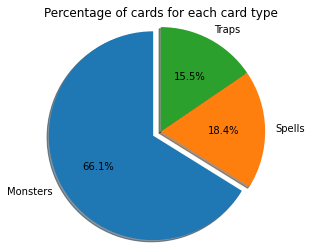

<Figure size 576x576 with 0 Axes>

In [11]:
card_nums = [monsters.shape[0], spell_cards.shape[0], trap_cards.shape[0]]
labels = ['Monsters', 'Spells', 'Traps']

# I will add explode to make the `Monsters` part stands out
explode = (0.1, 0, 0)

fig, ax = plt.subplots();
plt.title("Percentage of cards for each card type")
fig = plt.figure(figsize=(8, 8));
ax.pie(card_nums, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode, radius=1.2);

### First, let's investigate monsters.

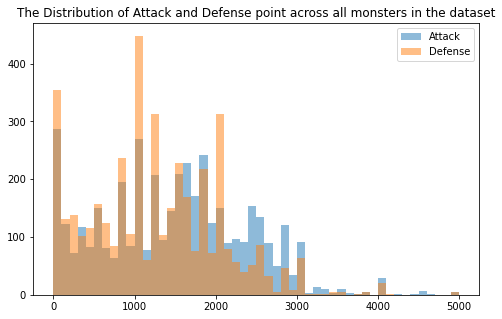

In [12]:
# I will plot the ATK  and DEF
plt.figure(figsize=(8, 5))
plt.hist(monsters['ATK'], bins=50, alpha=0.5)

# since there are monsters with negative defense, we will exclude them first

plt.hist(monsters['DEF'], bins=50, alpha=0.5);

plt.legend(['Attack', 'Defense'])
plt.title("The Distribution of Attack and Defense point across all monsters in the dataset");


### Peaks for both attack and defense points are at (0, 1800 and 2200) points with a slight peak at 4000 points.

### Let's find the relation between the attack and defense points.

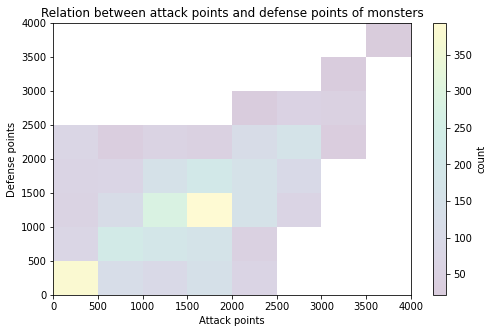

In [13]:
# prepare to plot atk and def on a 2d histogram
plt.figure(figsize=(8, 5))
plt.title("Relation between attack points and defense points of monsters")
bins = np.arange(0, 4000+500, 500)
plt.hist2d(data=monsters, x='ATK', y='DEF', alpha=.2, cmin=20, bins=[bins, bins])
plt.colorbar(label = 'count')
plt.xlim(right=4000)
plt.ylim(top=4000);
plt.xlabel("Attack points")
plt.ylabel("Defense points");


### The trend shows that monsters have nearly equal attack and defense points.

### Next, let's take a look at monster levels..

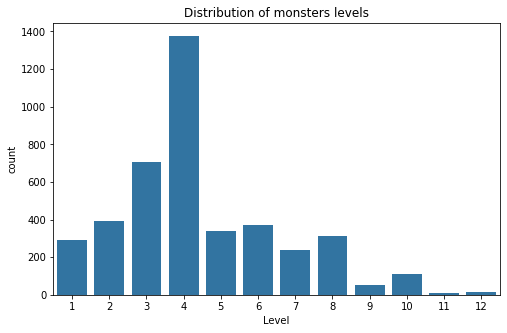

In [14]:
# I will plot their level distribution
plt.figure(figsize=(8, 5))
plt.title("Distribution of monsters levels")
sns.countplot(data=monsters, x='Level', color=sns.color_palette()[0]);


### Monsters level ranges from 1-12. It seems that the most common level is 4 and their number gradually decease until it reaches level 12. What does the level can do with attack and defense? Let's find out.

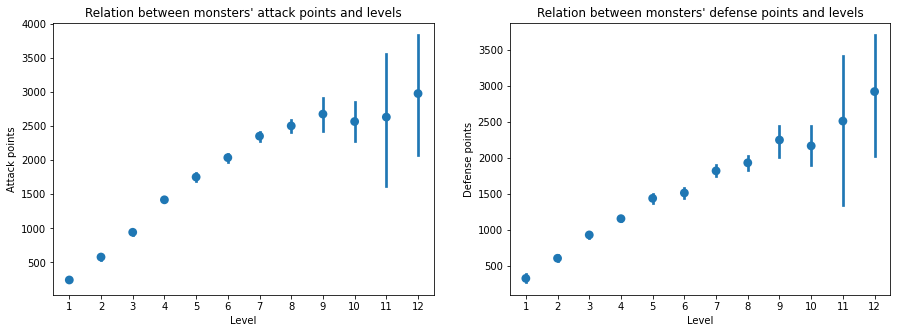

In [15]:
# plot atk and def against level..

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Relation between monsters' attack points and levels")
sns.pointplot(data=monsters, x='Level', y='ATK', join=False)
plt.ylabel("Attack points")

plt.subplot(1, 2, 2)
plt.title("Relation between monsters' defense points and levels")
sns.pointplot(data=monsters, x='Level', y='DEF', join=False);
plt.ylabel("Defense points");


### The mean attack and defense points increase with the increase of the level with high variabiity in both attack and defense points with last 4 levels.

## Does the Monster type do anything with attack and defense?

### First, we'll take a look at the monster races and the most common ones.

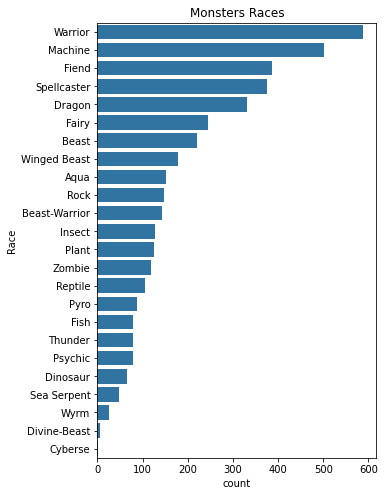

In [16]:
# plot the monster races with most common ones
plt.figure(figsize=(5, 8))
plt.title("Monsters Races")
ordered_race = monsters.groupby('Race')['Race'].count().sort_values(ascending=False).index
sns.countplot(data=monsters, y='Race', order=ordered_race,  color=sns.color_palette()[0]);

### Now let's see the relation between the most common 7 monster races and their attack and defense.

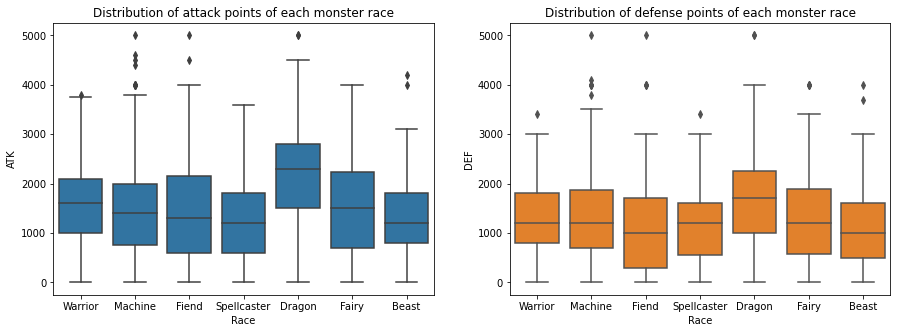

In [17]:
# plot the distributions of each monster races

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Distribution of attack points of each monster race")
sns.boxplot(data=monsters, x='Race', y='ATK', order=ordered_race[:7], color=sns.color_palette()[0])

plt.subplot(1, 2, 2)
plt.title("Distribution of defense points of each monster race")
sns.boxplot(data=monsters, x='Race', y='DEF', order=ordered_race[:7], color=sns.color_palette()[1]);


### Dragon-Type monsters have the highest average attack and defense, while Fiend and Fairy-Type monsters have a larger variaty in attack and defense points.

### Finally, We will investigate the monster types and attributes.

In [18]:
# format their names to be shorter
monsters['Type'] = monsters['Type'].apply(lambda x:x.replace(" Monster", ''))

In [19]:
# I re-categorized monsters to ease of use.
m_types = []
for ty in monsters['Type']:
    if ty.find('Pendulum') != -1:
        m_types.append('Pendulum')
    elif ty.find('XYZ') != -1:
        m_types.append('XYZ')
    elif ty.find('Synchro') != -1:
        m_types.append('Synchro')
    elif ty.find('Fusion') != -1:
        m_types.append('Fusion')
    elif ty.find('XYZ') != -1:
        m_types.append('XYZ')
    elif ty.find('Ritual') != -1:
        m_types.append('Ritual')
    elif ty.find('Tuner') != -1:
        m_types.append('Tuner')
    elif ty.find('Effect') != -1:
        m_types.append('Effect')
    else: m_types.append(ty)

monsters['Type'] = m_types

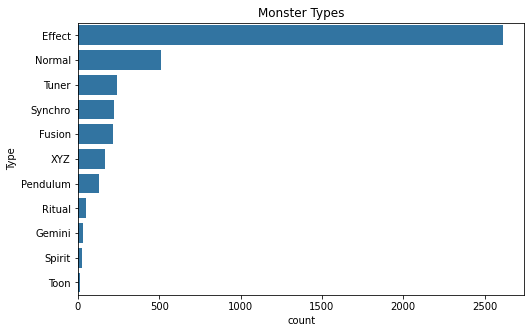

In [20]:
# sort with most common monster types
plt.figure(figsize=(8, 5))
plt.title("Monster Types")
ordered_mtypes = monsters.groupby('Type')['Type'].count().sort_values(ascending=False)
sns.countplot(data=monsters, y='Type', order=ordered_mtypes.index, color=sns.color_palette()[0]);

### I will continue with the top 6 types to explore better further.

### We'll take a look at the monster attributes.

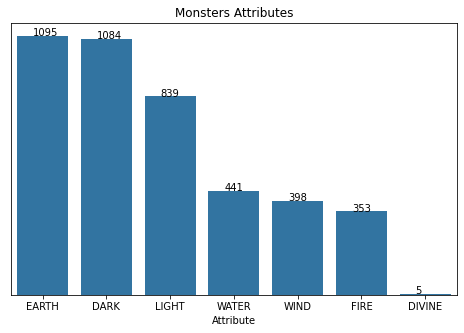

In [21]:
# plot the monsters attributes and their frequency
plt.figure(figsize=(8, 5))
plt.title("Monsters Attributes")
ordered_attrs = monsters.groupby('Attribute')['Attribute'].count().sort_values(ascending=False)
ax = sns.countplot(data=monsters, x='Attribute', order=ordered_attrs.index, color=sns.color_palette()[0])

for p, label in zip(ax.patches, ordered_attrs):
    ax.annotate(label, (p.get_x()+.25, p.get_height()+.15))

plt.ylabel("")
plt.yticks([], []);


### Let's see the attack points in every attribute and the top 6 common monster card type.

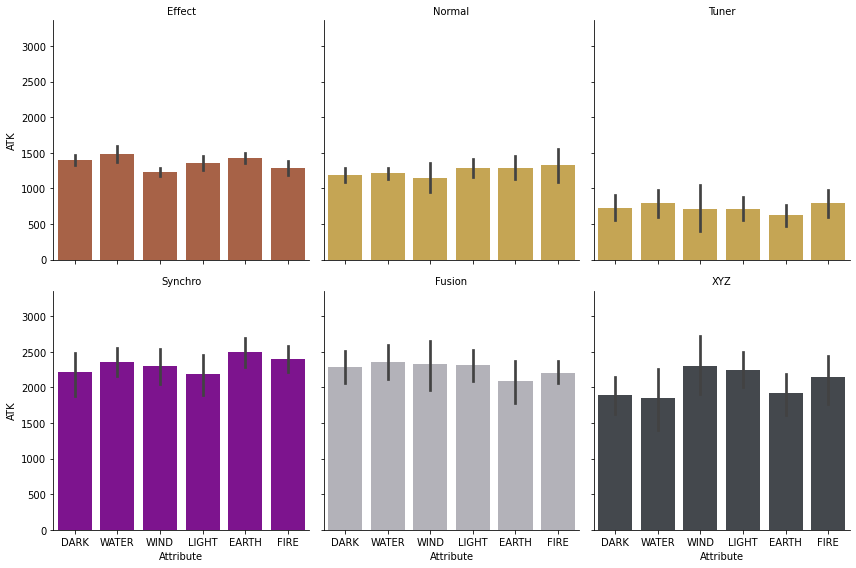

In [22]:
palette = sns.color_palette()

# color the bars based on the card colors
d = {'color' : ['#b75b37', '#d8ad41', '#d8ad41', '#8c00a2', '#b2b1ba', '#43484e']}

g = sns.FacetGrid(data=monsters, 
                    col='Type', 
                    col_order=ordered_mtypes.index[:6], 
                    hue='Type', 
                    hue_order=ordered_mtypes.index[:6], 
                    hue_kws=d, 
                    col_wrap=3, size=4)

g.map(sns.barplot, 'Attribute', 'ATK')
g.set_titles(col_template="{col_name}");


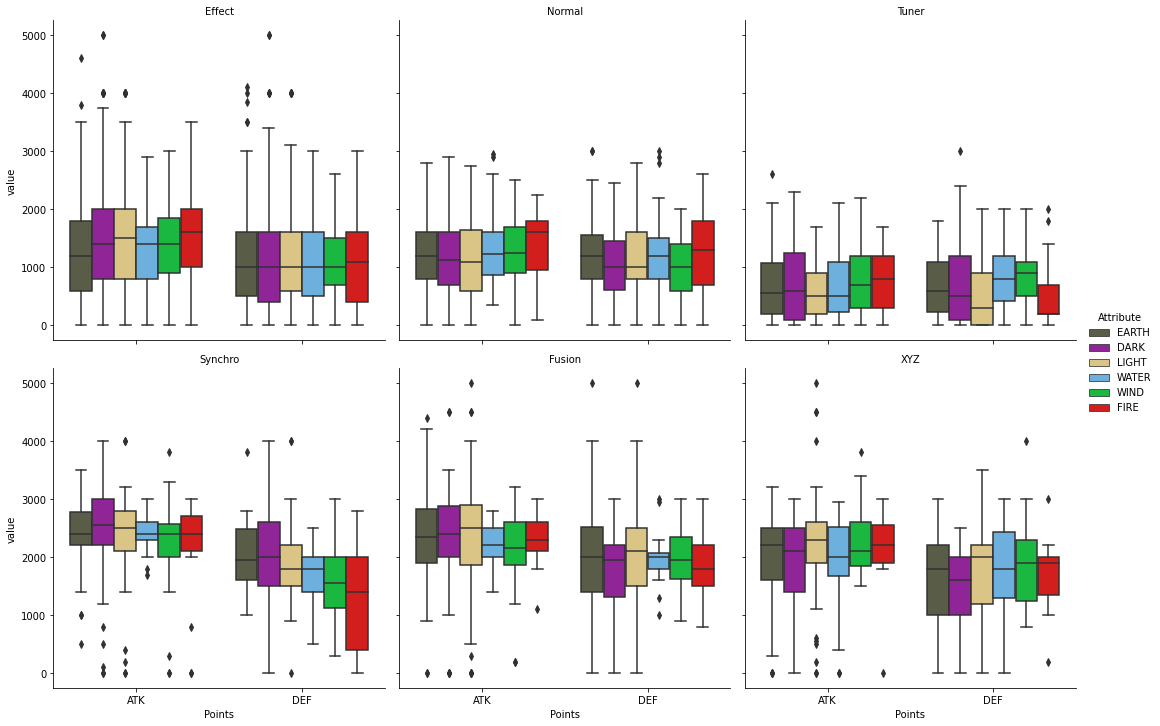

In [48]:
# melt the two categorical variables I will use to make multivariate boxplot
# I used the iconic colors of the Attribute logos for better appearance

df = pd.melt(monsters, id_vars=['Attribute', 'Type'])
df = df[ (df['variable'] == 'ATK') | (df['variable'] == 'DEF') ]
d = ['#5b5f43', '#9f12a9', '#e8cc79', '#5ab4f0', '#00d233', '#f10000']
sns.set_palette(d)

g = sns.factorplot(data=df, x='variable', y='value', 
               hue='Attribute', col='Type', 
               kind='box', legend=True, 
               col_order=ordered_mtypes.index[:6], 
               hue_order=ordered_attrs.index[:-1],
               col_wrap=3);

g.set_titles('{col_name}');
g.set_xlabels('Points')

### Fusion, Synchro and XYZ monsters have higher attacks than the other types, while Tuner monsters have the lowest.

## Second, let's investigate the Spell and Trap cards..

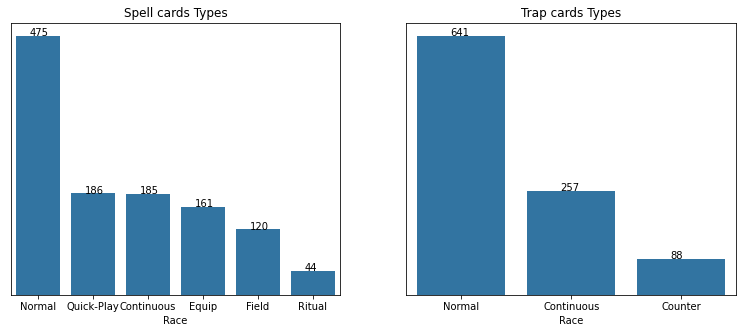

In [24]:
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.title("Spell cards Types")
ordered_srace = spell_cards.groupby('Race').count()['Name'].sort_values(ascending=False)
ax = sns.countplot(data=spell_cards, x='Race', order=ordered_srace.index, color=palette[0])
for p, label in zip(ax.patches, ordered_srace):
    ax.annotate(label, (p.get_x()+.25, p.get_height()))
plt.ylabel("")
plt.yticks([], [])

plt.subplot(1, 2, 2)
plt.title("Trap cards Types")
ordered_trace = trap_cards.groupby('Race').count()['Name'].sort_values(ascending=False)
ax = sns.countplot(data=trap_cards, x='Race', order=ordered_trace.index, color=palette[0])
for p, label in zip(ax.patches, ordered_trace):
    ax.annotate(label, (p.get_x()+.3, p.get_height()))
plt.ylabel("")
plt.yticks([], []);


# Conclusion

#### The data gave us a brief introduction for the game and their cards. Monsters are the majority of cards, spell and traps cards comes next.
#### Monsters attack and defense points of a monster are pretty near to each other while defense points tends to decrease with a monster with higher attack points and vice versa.

# Limitations

#### Unfortunately, I couldn't introduce game ruling as the dataset lacks card effects which would have made a drastic change in our analysis and finding more complex relations and game strategies.